In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_DIR=('/content/drive/MyDrive/chest_xray/chest_xray')
train_dir=os.path.join(BASE_DIR,'train/')
val_dir=os.path.join(BASE_DIR,'val/')
test_dir=os.path.join(BASE_DIR,'test/')

print('Number of images in training set = ',str(len(glob(train_dir+'*/*'))))
print('Number of images in validation set = ',str(len(glob(val_dir+'*/*'))))
print('Number of images in testing set = ',str(len(glob(test_dir+'*/*'))))

Number of images in training set =  5293
Number of images in validation set =  16
Number of images in testing set =  624


In [ ]:
training_images = tf.io.gfile.glob('/content/drive/MyDrive/chest_xray/chest_xray/train/*/*')
validation_images = tf.io.gfile.glob('/content/drive/MyDrive/chest_xray/chest_xray/val/*/*')


total_files = training_images
total_files.extend(validation_images)
print(f'Total number of images : training_images + validation_images = {len(total_files)}\n')

#spliting 80:20
train_images, val_images = train_test_split(total_files, test_size = 0.2)
print(f'After division of 80:20')
print(f'Total number of training images = {len(train_images)}')
print(f'Total number of validation images = {len(val_images)}')

Total number of images : training_images + validation_images = 5313

After division of 80:20
Total number of training images = 4250
Total number of validation images = 1063


In [ ]:
tf.io.gfile.makedirs('/New Xrays/working/val_dataset/NORMAL/')
tf.io.gfile.makedirs('/New Xrays/working/val_dataset/PNEUMONIA/')
tf.io.gfile.makedirs('/New Xrays/working/train_dataset/NORMAL/')
tf.io.gfile.makedirs('/New Xrays/working/train_dataset/PNEUMONIA/')

In [ ]:
import os

for ele in train_images:
    parts_of_path = ele.split('/')
    dest_path = '/New Xrays/working/train_dataset/PNEUMONIA/' if 'PNEUMONIA' == parts_of_path[-2] else '/New Xrays/working/train_dataset/NORMAL/'
    dest_path += parts_of_path[-1]

    # Check if the file exists at the destination
    if not tf.io.gfile.exists(dest_path):
        tf.io.gfile.copy(src=ele, dst=dest_path)
    else:
        print(f"File already exists at {dest_path}. Skipping.")


File already exists at /New Xrays/working/train_dataset/NORMAL/.DS_Store. Skipping.


In [ ]:
for ele in val_images:
    parts_of_path = ele.split('/')
    destination = ''

    if 'PNEUMONIA' == parts_of_path[-2]:
        destination = '/New Xrays/working/val_dataset/PNEUMONIA/' +  parts_of_path[-1]
    else:
        destination = '/New Xrays/working/val_dataset/NORMAL/' +  parts_of_path[-1]

    # Check if the file already exists
    if tf.io.gfile.exists(destination):
        print(f"File '{destination}' already exists. Skipping.")
    else:
        tf.io.gfile.copy(src=ele, dst=destination)


In [ ]:
print('Pneumonia x-ray images in training set after split = ',len(os.listdir('/New Xrays/working/train_dataset/PNEUMONIA/')))
print('Normal x-ray images in training set after split = ',len(os.listdir('/New Xrays/working/train_dataset/NORMAL/')))
print('Pneumonia x-ray images in validation set after split = ',len(os.listdir('/New Xrays/working/val_dataset/PNEUMONIA/')))
print('Normal x-ray images in validation set after split = ',len(os.listdir('/New Xrays/working/val_dataset/NORMAL/')))
print('Pneumonia x-ray images in test set = ',len(os.listdir('/content/drive/MyDrive/chest_xray/chest_xray/test/PNEUMONIA')))
print('Normal x-ray images in test set = ',len(os.listdir('/content/drive/MyDrive/chest_xray/chest_xray/test/NORMAL')))


Pneumonia x-ray images in training set after split =  3164
Normal x-ray images in training set after split =  1085
Pneumonia x-ray images in validation set after split =  798
Normal x-ray images in validation set after split =  265
Pneumonia x-ray images in test set =  390
Normal x-ray images in test set =  234


In [ ]:
train_dir='/New Xrays/working/train_dataset/'
val_dir='/New Xrays/working/val_dataset/'
test_dir='/content/drive/MyDrive/chest_xray/chest_xray/test/'

train_normal_dir='/New Xrays/working/train_dataset/NORMAL'
train_pneumonia_dir='/New Xrays/working/train_dataset/PNEUMONIA'
val_normal_dir='/New Xrays/working/val_dataset/NORMAL'
val_pneumonia_dir='/New Xrays/working/val_dataset/PNEUMONIA'

In [ ]:
train_normal_fnames=os.listdir(train_normal_dir)
train_pneumonia_fnames=os.listdir(train_pneumonia_dir)

print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])

['NORMAL2-IM-1126-0001.jpeg', 'IM-0557-0001.jpeg', 'IM-0607-0001.jpeg', 'NORMAL2-IM-0635-0001.jpeg', 'NORMAL2-IM-0577-0001.jpeg', 'IM-0221-0001.jpeg', 'NORMAL2-IM-0437-0001.jpeg', 'IM-0629-0001.jpeg', 'IM-0534-0001.jpeg', 'IM-0213-0001.jpeg']
['person1502_bacteria_3928.jpeg', 'person543_bacteria_2281.jpeg', 'person294_bacteria_1386.jpeg', 'person371_bacteria_1696.jpeg', 'person1679_bacteria_4452.jpeg', 'person370_bacteria_1688.jpeg', 'person444_bacteria_1927.jpeg', 'person1484_virus_2577.jpeg', 'person1325_virus_2287.jpeg', 'person1018_bacteria_2949.jpeg']


**Visualizing pneumonia x-ray images and normal x-ray images**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

no_cols=4
no_rows=4

pic_index=0

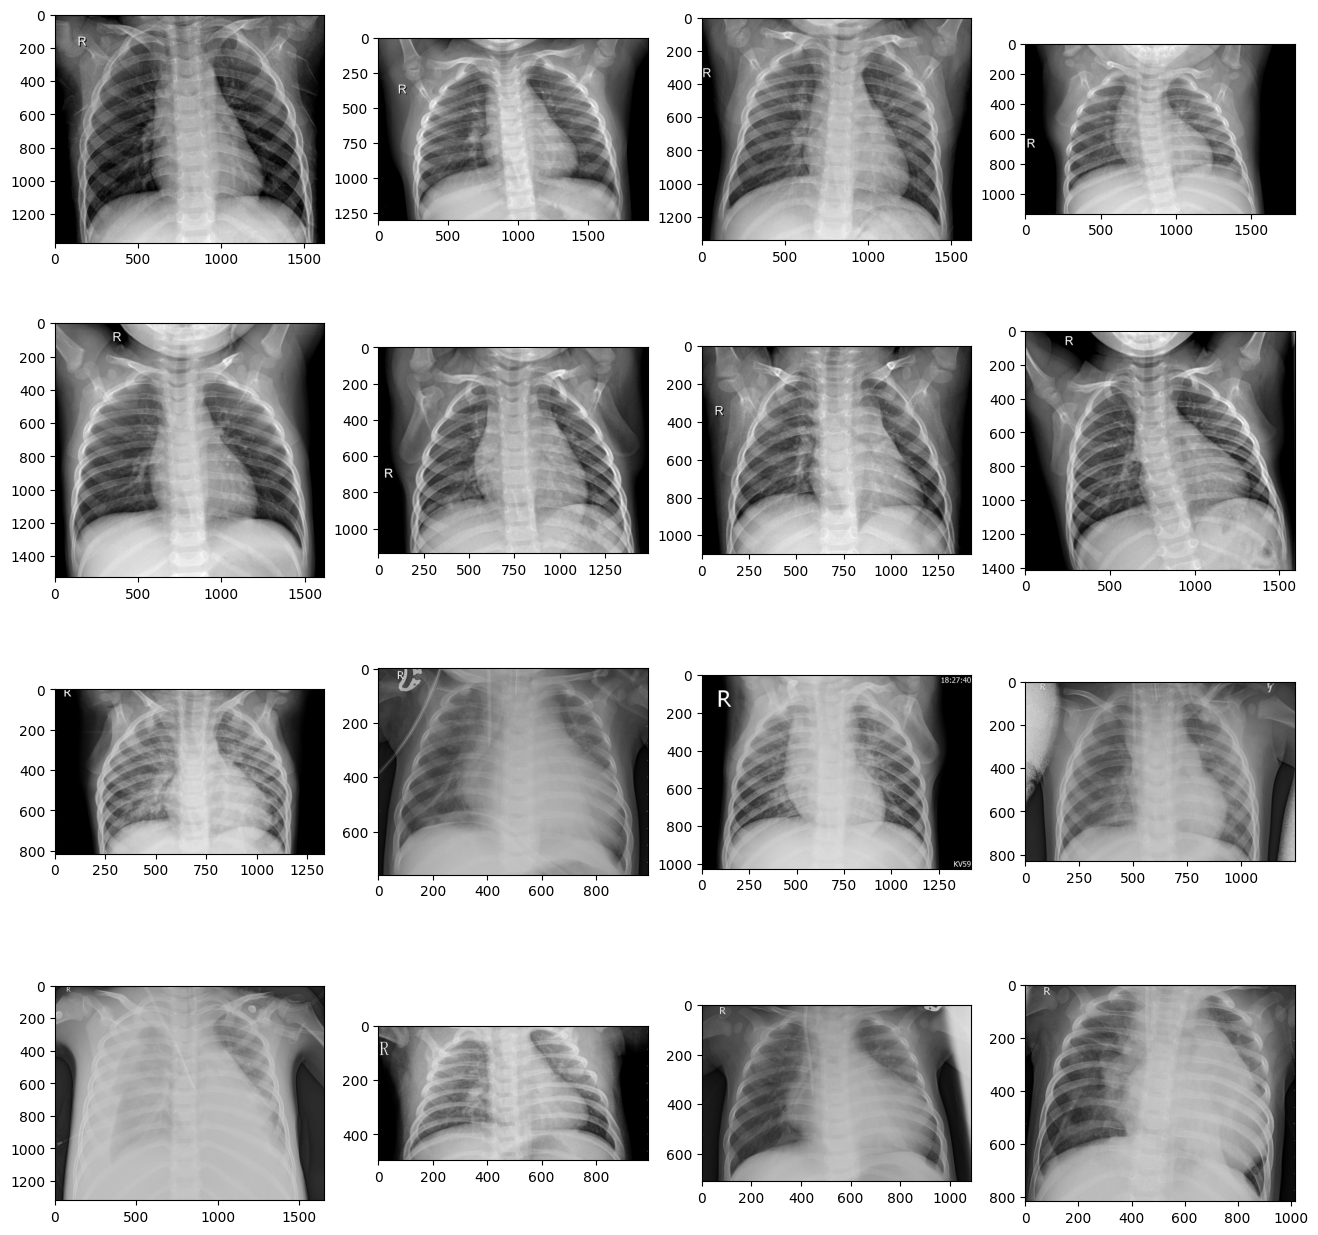

In [ ]:
fig=plt.gcf()
fig.set_size_inches(no_cols*4,no_rows*4)

pic_index+=8

normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
pneumonia_pix=[os.path.join(train_pneumonia_dir,fname) for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(normal_pix+pneumonia_pix):
    sp=plt.subplot(no_rows,no_cols,i+1)
    sp.axis()

    img=mpimg.imread(img_path)
    plt.imshow(img,cmap='gray')

plt.show()

# first 8 images are normal x-ray images and next 8 images are pnemonia x-ray images

**CNN Model**

In [ ]:
model=tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

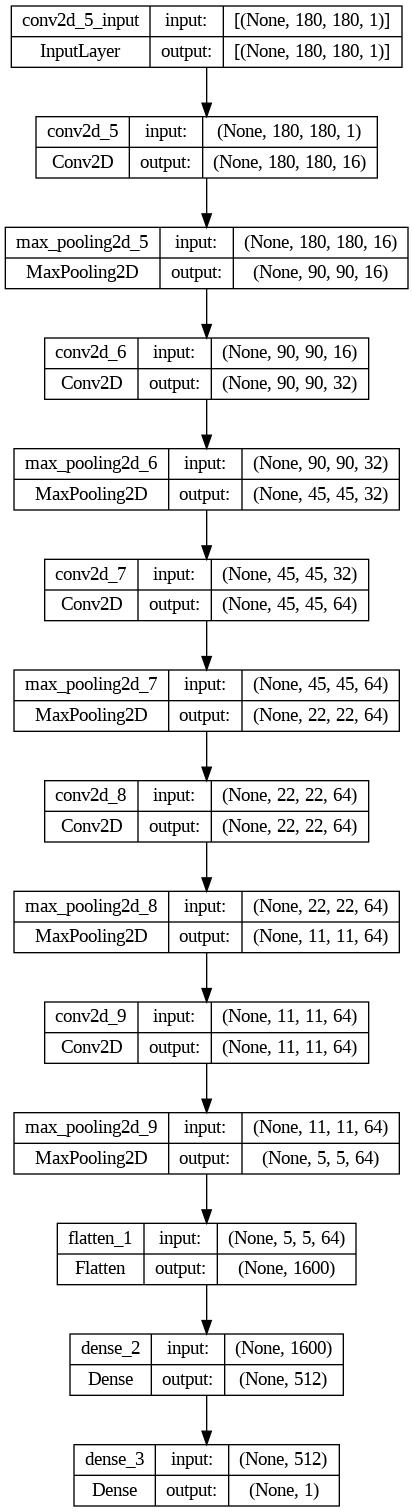

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Plot the model architecture and save it as a JPEG image
plot_model(model, to_file='cnn_architecture.jpg', show_shapes=True, show_layer_names=True)


In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])

**Overview of model**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      160       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 64)       

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

val_generator=val_datagen.flow_from_directory(val_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

Found 4245 images belonging to 2 classes.
Found 1063 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,validation_data=val_generator,epochs=30,verbose=2)

Epoch 1/30
34/34 - 198s - loss: 0.6025 - accuracy: 0.7176 - precision: 0.7468 - recall: 0.9403 - val_loss: 0.5720 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000 - 198s/epoch - 6s/step
Epoch 2/30
34/34 - 207s - loss: 0.5598 - accuracy: 0.7461 - precision: 0.7468 - recall: 0.9981 - val_loss: 0.5530 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000 - 207s/epoch - 6s/step
Epoch 3/30
34/34 - 195s - loss: 0.5000 - accuracy: 0.7611 - precision: 0.7890 - recall: 0.9280 - val_loss: 0.5765 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000 - 195s/epoch - 6s/step
Epoch 4/30
34/34 - 199s - loss: 0.4205 - accuracy: 0.7969 - precision: 0.8226 - recall: 0.9280 - val_loss: 0.3683 - val_accuracy: 0.8203 - val_precision: 0.8074 - val_recall: 0.9962 - 199s/epoch - 6s/step
Epoch 5/30
34/34 - 210s - loss: 0.3709 - accuracy: 0.8193 - precision: 0.8684 - recall: 0.8933 - val_loss: 0.3525 - val_accuracy: 0.8843 - val_precision: 0.9383 - val_recall: 0.903

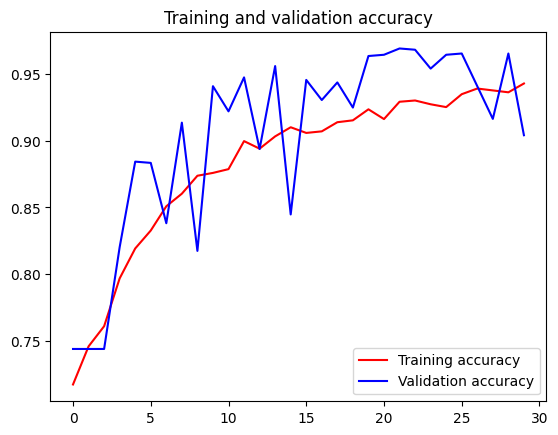

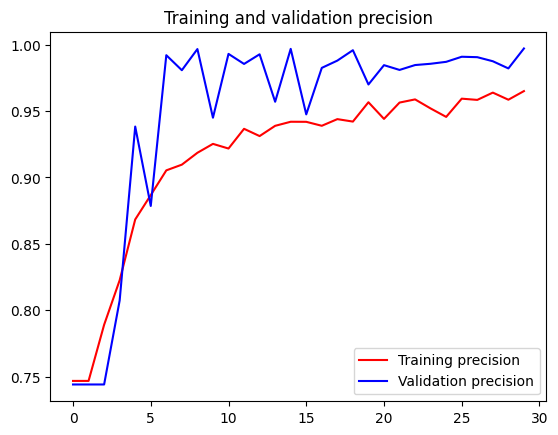

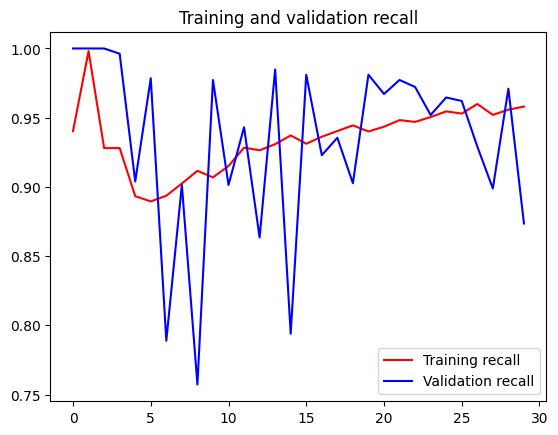

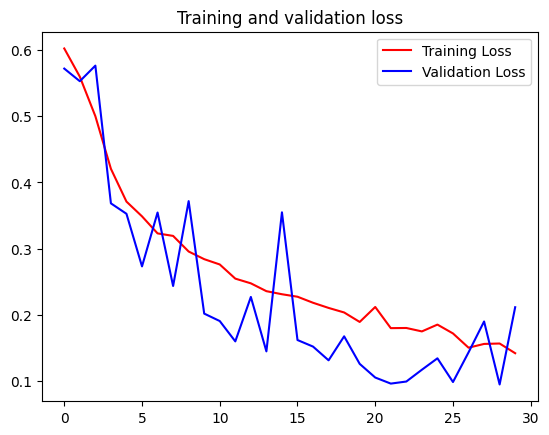

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_precision=history.history['precision']
val_precision=history.history['val_precision']

train_recall=history.history['recall']
val_recall=history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()

plt.plot(epochs, train_recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
eval_result1 = model.evaluate_generator(test_generator, 624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])


<ipython-input-21-46bd9660b648>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result1 = model.evaluate_generator(test_generator, 624)


loss  : 0.2572327256202698
accuracy  : 0.8974359035491943
Precision : 0.9244791865348816
Recall : 0.9102563858032227


**Model 2 ResNet-50**

In [ ]:
train_datagen2=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen2=ImageDataGenerator(rescale=1.0/255)

test_datagen2=ImageDataGenerator(rescale=1.0/255)

train_generator2=train_datagen2.flow_from_directory(train_dir,target_size=(180,180),batch_size=128,class_mode='binary')

val_generator2=val_datagen2.flow_from_directory(val_dir,target_size=(180,180),batch_size=128,class_mode='binary')

test_generator2=test_datagen2.flow_from_directory(test_dir,target_size=(180,180),batch_size=128,class_mode='binary')

Found 4246 images belonging to 2 classes.
Found 1062 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
pretrained_model2 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

#freazing the trained layers
for layers in pretrained_model2.layers:
    layers.trainable = False
#pretrained_model3.summary()

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
last_layer=pretrained_model2.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2=tf.keras.Model(pretrained_model2.input,x)

model2.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
history2=model2.fit(train_generator2,validation_data=val_generator2,epochs=30,verbose=2)

In [ ]:
model2.save('/content/drive/MyDrive/Model/model2.h5')

In [ ]:
model.save('/content/drive/MyDrive/Model/model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras

model_path = "/content/drive/MyDrive/Model/model.h5"
model = keras.models.load_model(model_path)


In [ ]:
from PIL import Image
import numpy as np

# Load the image
image_path = "/content/person1_virus_7 (1).jpeg"
image = Image.open(image_path)

# Resize the image to match your model's input size (adjust 'width' and 'height')
width, height = model.input_shape[1], model.input_shape[2]
image = image.resize((width, height))

# Convert the image to a numpy array and normalize it
image = np.array(image) / 255.0


In [ ]:
predictions = model.predict(np.expand_dims(image, axis=0))


In [ ]:
if predictions[0] < 0.5:
    result = "No Pneumonia"
else:
    result = "Pneumonia Detected"
print(result)


In [ ]:
predictions = model.predict(np.expand_dims(image, axis=0))


In [ ]:
from PIL import Image
import numpy as np

# Load the image
image_path = "/content/drive/MyDrive/Main_folder/train/NORMAL/IM-0119-0001.jpeg"
image = Image.open(image_path)

# Resize the image to match your model's input size (adjust 'width' and 'height')
width, height = model.input_shape[1], model.input_shape[2]
image = image.resize((width, height))

# Convert the image to a numpy array and normalize it
image = np.array(image) / 255.0


In [ ]:
predictions = model.predict(np.expand_dims(image, axis=0))


In [ ]:
if predictions[0] < 0.5:
    result = "No Pneumonia"
else:
    result = "Pneumonia Detected"
print(result)
